Конфигурационная модель (https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.directed_configuration_model.html)

Генерируем рапсределние степеней (in/out):
* in/out - Poisson
* in/out - Степенное

Определить количество петель, мультиребер, двунаправленных связей

In [1]:
import networkx as nx

In [80]:
def edges_type(degree_type, graph):
    edges = graph.edges()
    print (f"Edges in graph with {degree_type} degree distribution: ", len(edges))

    bidirected = 0
    self_loops = 0
    multiedges = 0

    for edge in edges:
        if edge[0] == edge[1]:
            self_loops += 1 
        if (edge[1], edge[0]) in edges:
            bidirected += 1

    edges_dict = {}
    for edge in edges:
        if edge in edges_dict:
            edges_dict[edge] += 1
        else:
            edges_dict[edge] = 1
        
    for val in edges_dict.values():
        if val > 1:
            multiedges += 1        
        
    print("Bidirected edges: ", bidirected, "(%f)" % float(bidirected / len(edges)))
    print("Self-loops in graph: ", self_loops, '(%f)' % float(self_loops / len(edges)))
    print("Multi-edges in graph: ", multiedges, "(%f)" % float(multiedges / len(edges)))        

Edges in graph with poisson degree distribution:  14082
Bidirected edges:  216 (0.015339)
Self-loops in graph:  17 (0.001207)
Multi-edges in graph:  90 (0.006391)


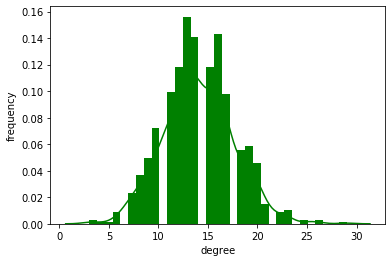

In [81]:
from scipy.stats import poisson
import seaborn as sb

data_binom = poisson.rvs(mu=14, size=1000)
ax = sb.distplot(data_binom,
                  color='green',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel = 'degree', ylabel = 'frequency')

in_degree = data_binom
out_degree = data_binom
graph_poisson = nx.directed_configuration_model(in_degree, out_degree, seed=42)
edges_type('poisson', graph_poisson)

Edges in graph with powerlaw degree distribution:  11998
Bidirected edges:  176 (0.014669)
Self-loops in graph:  14 (0.001167)
Multi-edges in graph:  75 (0.006251)


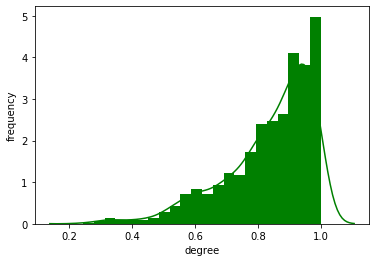

In [83]:
from scipy.stats import powerlaw
import seaborn as sb

data_powerlaw = powerlaw.rvs(a=5, size=1000)
ax = sb.distplot(data_powerlaw,
                  color='green',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel = 'degree', ylabel = 'frequency')

new_arr = list(np.array(data_powerlaw)*15)
new_arr = [int(i) for i in new_arr]
in_degree = new_arr
out_degree = new_arr
graph_powerlaw = nx.directed_configuration_model(in_degree, out_degree, seed=42)
edges_type('powerlaw', graph_powerlaw)

В графе со степенным распределением in/out степеней доли двунаправленных мультиребер в графах близки